# Graphs for Stack Overflow Developer Survey 

## Read data from CSV

In [1]:
import pandas as pd
all_data = pd.read_csv('survey_results_public_cleaned_use.csv')

# limit the data to people ages 18 - 34
df = all_data.query('Age in ["18-24 years old", "25-34 years old"]')
df.head()

,ResponseId,MainBranch,Age,Employment,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,TimeSearching,ProfessionalTech,Industry,ConvertedCompYearly
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,...,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,...,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,15-30 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,...,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree,60-120 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0
7,8,I am a developer by profession,25-34 years old,"Employed, full-time",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Codecademy;edX,5,...,NaN,NaN,NaN,NaN,NaN,NaN,60-120 minutes a day,None of these,Financial Services,80000.0


## Helper Functions to Split Semicolon Delimited Columns

In [2]:
def getUnique(column):
    possibleActivities = set()
    for unique in df[column].unique():
        if not type(unique) is str: continue 
        
        for activity in unique.split(';'):
            possibleActivities.add(activity)

    possibleActivities = sorted(possibleActivities)
    return possibleActivities

def separate_into_boolean_columns(column):
    global df
    # Split the activities and create Boolean columns
    unique_activities = getUnique(column)
    for activity in unique_activities:
        df[activity] = df[column].str.split(";").apply(lambda x: activity in x if type(x) is list else False)

    # Fill NaN values with False
    df = df.fillna(False)
    return df.describe()

columns = ["LanguageHaveWorkedWith",  "CodingActivities", 'Industry']
for column in columns:
    print(getUnique(column))
    separate_into_boolean_columns(column)

['APL', 'Ada', 'Apex', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'OCaml', 'Objective-C', 'PHP', 'Perl', 'PowerShell', 'Prolog', 'Python', 'R', 'Raku', 'Ruby', 'Rust', 'SAS', 'SQL', 'Scala', 'Solidity', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig']


C:\Users\akash\AppData\Local\Temp\ipykernel_19008\2918029750.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[activity] = df[column].str.split(";").apply(lambda x: activity in x if type(x) is list else False)
C:\Users\akash\AppData\Local\Temp\ipykernel_19008\2918029750.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[activity] = df[column].str.split(";").apply(lambda x: activity in x if type(x) is list else False)
C:\Users\akash\AppData\Local\Temp\ipykernel_19008\2918029750.py:17: SettingWithC

['Bootstrapping a business', 'Contribute to open-source projects', 'Freelance/contract work', 'Hobby', 'I don’t code outside of work', 'Other (please specify):', 'Professional development or self-paced learning from online courses', 'School or academic work']
['Advertising Services', 'Financial Services', 'Healthcare', 'Higher Education', 'Information Services, IT, Software Development, or other Technology', 'Insurance', 'Legal Services', 'Manufacturing, Transportation, or Supply Chain', 'Oil & Gas', 'Other', 'Retail and Consumer Services', 'Wholesale']


## Graph Industries that Certain Languages are Used In

### Find the exact Industries from the Database

In [3]:
all_industries = getUnique('Industry')

language_industries = {
    # language: {industry: count}
}

target_languages = ['Python', 'JavaScript', 'Rust', 'SQL', 'TypeScript', 'Bash/Shell (all shells)']

# Create a dictionary of languages
languages = {}

# Convert numbers to floats and less than 1 year text to 0\
map_dict = { 'Less than 1 year': 0.5, 'More than 50 years': 51, False: 0.5 }
for num in range(1, 51):
    map_dict[str(num)] = num

df['YearsCodeProNum'] = df['YearsCodePro'].map(map_dict).astype(float)

for language in target_languages:
    # make sure only language is true and all the other languages in the list are false
    target_language = df[df[language] == True]

    for other_language in target_languages:
        if other_language == language: continue
        target_language = target_language[target_language[other_language] == False]
    
    print(f'{language} has {target_language.shape[0]} rows')
    
    # find the salary
    average_salary = target_language['ConvertedCompYearly'].mean()
    
    average_years_worked = target_language['YearsCodeProNum'].mean()
    languages[language] = [df[language].sum(), average_salary, average_years_worked]
    language_industries[language] = {industry: target_language[industry].sum() for industry in all_industries}

language_industries_proportions = {}
for language in language_industries:
    get_sum = sum(language_industries[language].values())
    language_industries_proportions[language] = {industry: language_industries[language][industry] * 100 / get_sum for industry in language_industries[language]}

counts = {}

for language in languages:
    counts[language] = df[language].sum()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

language_industries

Python has 2936 rows
JavaScript has 2507 rows
Rust has 440 rows
SQL has 1153 rows
TypeScript has 656 rows
Bash/Shell (all shells) has 524 rows


{'Python': {'Advertising Services': 17,
  'Financial Services': 101,
  'Healthcare': 50,
  'Higher Education': 46,
  'Information Services, IT, Software Development, or other Technology': 457,
  'Insurance': 14,
  'Legal Services': 4,
  'Manufacturing, Transportation, or Supply Chain': 100,
  'Oil & Gas': 13,
  'Other': 164,
  'Retail and Consumer Services': 42,
  'Wholesale': 4},
 'JavaScript': {'Advertising Services': 32,
  'Financial Services': 104,
  'Healthcare': 44,
  'Higher Education': 18,
  'Information Services, IT, Software Development, or other Technology': 549,
  'Insurance': 10,
  'Legal Services': 11,
  'Manufacturing, Transportation, or Supply Chain': 54,
  'Oil & Gas': 6,
  'Other': 85,
  'Retail and Consumer Services': 59,
  'Wholesale': 8},
 'Rust': {'Advertising Services': 1,
  'Financial Services': 13,
  'Healthcare': 5,
  'Higher Education': 1,
  'Information Services, IT, Software Development, or other Technology': 66,
  'Insurance': 1,
  'Legal Services': 1,
  '

### Create a Stacked Bar Plot to Show the Industries that Certain Languages are Used In

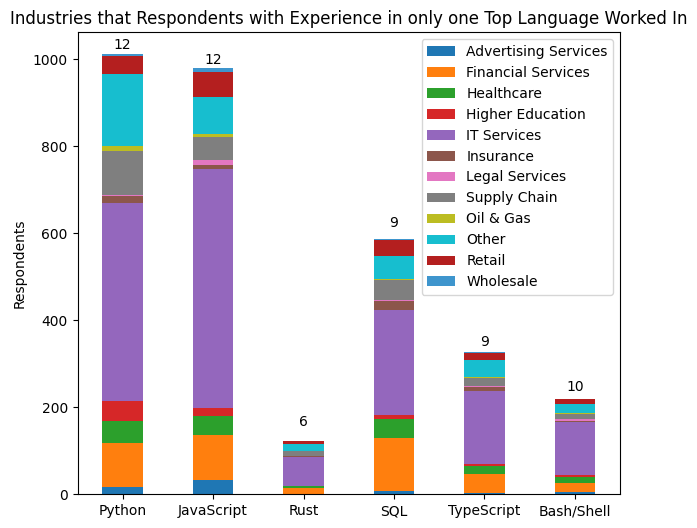

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get top 10 languages
top_10_languages = target_languages

# Convert industry data to this dictionary format
industry_means = {}

for industry in all_industries:
    industry_means[industry] = [language_industries[language][industry] for language in top_10_languages]

x = np.arange(len(top_10_languages))  # the label locations
width = 0.45  # the width of the bars
bottom = np.zeros(len(top_10_languages))  # Initialize the bottom values for stacking

fig, ax = plt.subplots(figsize=(7, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
          '#b41f1f', '#3e95cd', '#75a31a', '#ff701a', '#f10a6f', '#5967d6', '#7167b8', '#f8dc39', '#a6b3a6', '#b17b50']

for index, (attribute, measurement) in enumerate(industry_means.items()):
    if attribute == 'Information Services, IT, Software Development, or other Technology':
        attribute = 'IT Services'
    if 'Manufacturing' in attribute:
        attribute = 'Supply Chain' 
    if 'Retail' in attribute:
        attribute = 'Retail'
    rects = ax.bar(x, measurement, width, label=attribute, bottom=bottom, color=colors[index])
    bottom += measurement

# Calculate the total number of industries for each language
total_industries = []

for language in top_10_languages:
    total = 0
    for industry in industry_means:
        total += 1 if language_industries[language][industry] > 3 else 0
    total_industries.append(total)

total_industries_labels = [f'{total}' for total in total_industries]

height_array = [1000, 950, 150, 600, 330, 225]

# Place the total number of industries above the bars
for i, (label, rect) in enumerate(zip(top_10_languages, ax.patches)):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + height_array[i], total_industries_labels[i],
            ha='center', va='bottom')


# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Respondents')
ax.set_title('Industries that Respondents with Experience in only one Top Language Worked In')
# replace Bash/Shell with Bash/Shell (all shells)
top_10_languages = [language if language != 'Bash/Shell (all shells)' else 'Bash/Shell' for language in top_10_languages]
ax.set_xticks(x, top_10_languages)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

plt.savefig('graphs/industry.png', bbox_inches='tight', dpi=600)
plt.show()

## Bar Plot of Languages Developers want to Learn

### Store data in a new dictionary

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

languages = getUnique('LanguageWantToWorkWith')
separate_into_boolean_columns('LanguageWantToWorkWith')
counts = {}

for language in languages:
    counts[language] = df[language].sum()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
# get the proportion of each language in the dataset
for key, value in enumerate(counts):
    counts[value] = round(counts[value] * 100 / len(df), 2)

top10 = dict(list(counts.items())[0:10])
top10

{'Python': 41.24,
 'TypeScript': 41.03,
 'JavaScript': 40.28,
 'HTML/CSS': 34.62,
 'Rust': 34.23,
 'SQL': 32.42,
 'Go': 22.91,
 'Bash/Shell (all shells)': 20.39,
 'C#': 19.83,
 'C++': 16.94}

### Create Simple Bar Plot

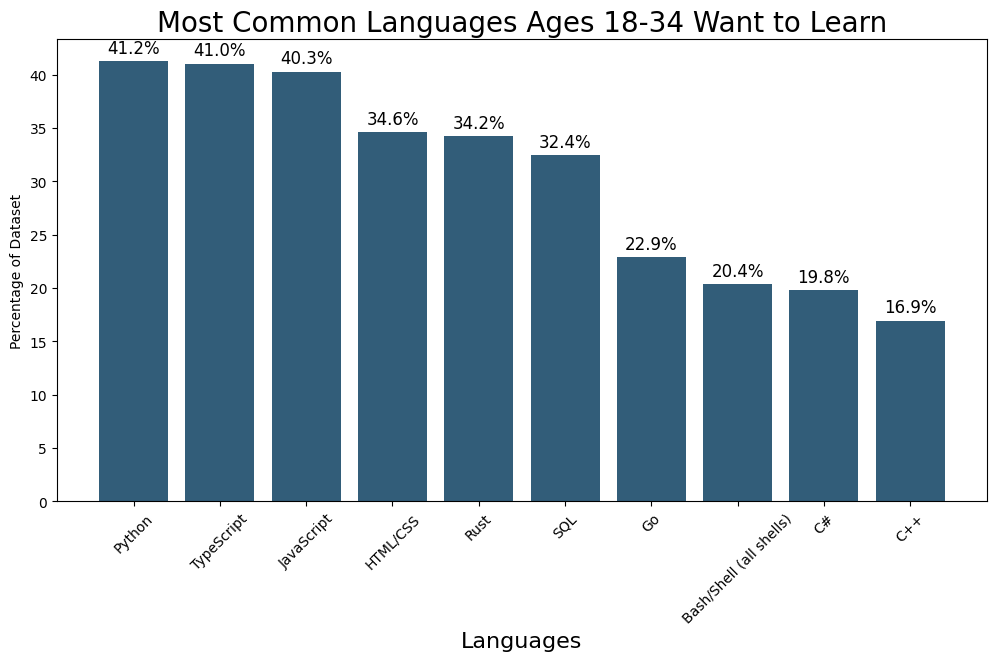

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined 'top10' and 'counts' as per your code

# Define a single blue color
blue_color = '#325d79'  # You can use any valid color name or hex code

plt.figure(figsize=(12, 6))

# Use the 'color' parameter to specify the bar color (single blue color)
bars = plt.bar(top10.keys(), top10.values(), color=blue_color)

# Add data labels (percent values) to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=12)

plt.title('Most Common Languages Ages 18-34 Want to Learn', fontsize=20)
plt.xlabel('Languages', fontsize=16)
plt.ylabel('Percentage of Dataset')
plt.xticks(rotation=45)

plt.savefig('graphs/want.png', bbox_inches='tight', dpi=600)
plt.show()

## Scatter Plot of Salary vs. Years of Experience and Language

### Limit to Only Python and JavaScript Developers

In [7]:
separate_into_boolean_columns('LanguageHaveWorkedWith')
limited_data = df[df['Python'] == True][df['JavaScript'] == True]

C:\Users\akash\AppData\Local\Temp\ipykernel_19008\727322646.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  limited_data = df[df['Python'] == True][df['JavaScript'] == True]


### Create a dictionary of averages

In [8]:
languages = {}

# Convert numbers to floats and less than 1 year text to 0\
map_dict = { 'Less than 1 year': 0.5, 'More than 50 years': 51, False: 0.5 }
for num in range(1, 51):
    map_dict[str(num)] = num

limited_data['YearsCodeProNum'] = limited_data['YearsCodePro'].map(map_dict).astype(float)

for language in getUnique('LanguageWantToWorkWith'):
    # find the salary
    average_salary = limited_data[limited_data[language] == True]['ConvertedCompYearly'].mean()
    
    average_years_worked = limited_data[limited_data[language] == True]['YearsCodeProNum'].mean()
    languages[language] = [limited_data[language].sum(), average_salary, average_years_worked]

languages = {k: v for k, v in sorted(languages.items(), key=lambda item: item[1][0], reverse=True)[:20]}

# language, count, average salary, average years worked
languages

{'JavaScript': [17368, 44733.83245048365, 3.524470290188853],
 'Python': [17368, 44733.83245048365, 3.524470290188853],
 'HTML/CSS': [13271, 41368.1655489413, 3.353891944842137],
 'SQL': [10769, 40860.47478874547, 3.6778716686786144],
 'TypeScript': [9753, 44982.810622372606, 3.788731672305957],
 'Bash/Shell (all shells)': [7653, 59410.44740624592, 3.8162158630602376],
 'Java': [7499, 33485.64261901587, 3.0484064541938927],
 'C++': [5696, 31262.415203651686, 2.696453651685393],
 'C': [5318, 25224.74313651749, 2.492290334712298],
 'C#': [4926, 34746.0736906212, 3.4318920016240355],
 'PHP': [4417, 28387.038714059316, 3.7102105501471585],
 'Rust': [3439, 42841.98284384995, 3.204274498400698],
 'Go': [3399, 55446.56369520447, 4.294204177699323],
 'PowerShell': [3288, 43503.924574209246, 3.6849148418491486],
 'Kotlin': [2150, 41400.73162790698, 3.5413953488372094],
 'Lua': [1786, 36347.164613661815, 3.1954087346024638],
 'Dart': [1737, 23461.4260218768, 2.787852619458837],
 'Assembly': [165

### Create a DataFrame from the Dictionary and a Scatter Plot

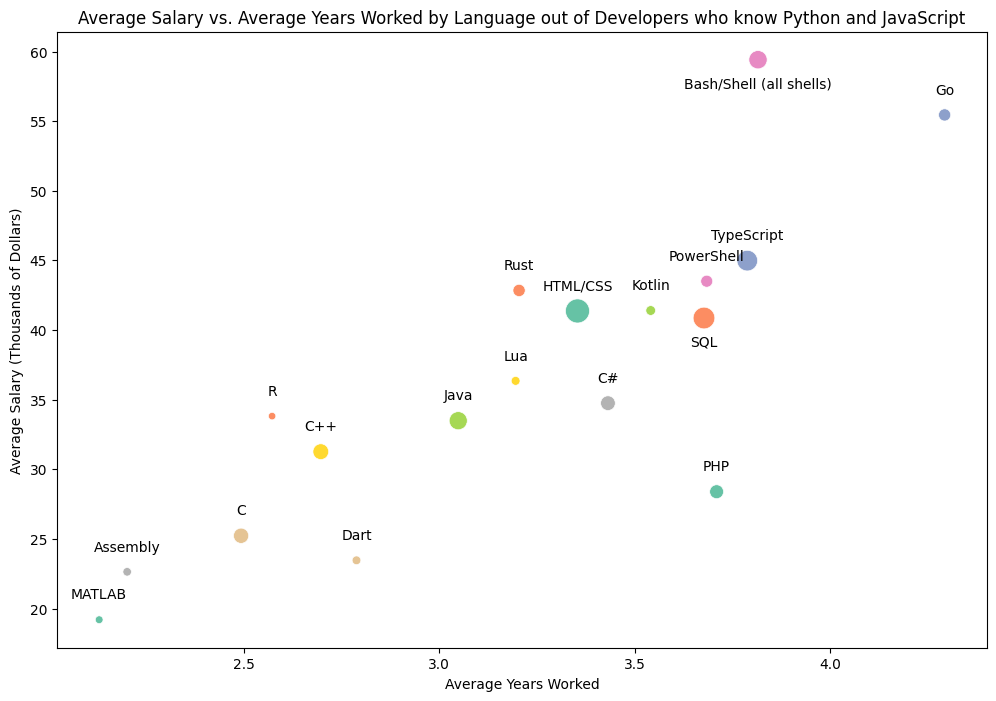

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the dictionary
data = {
    'Language': [],
    'Years Worked': [],
    'Salary': [],
    'Respondents': []
}

for language, values in languages.items():
    if language in ('Python', 'JavaScript'):
        continue
    data['Language'].append(language)
    data['Years Worked'].append(values[-1])
    data['Salary'].append(values[-2] / 1000)
    data["Respondents"].append(values[-3])

new_df = pd.DataFrame(data)

# Scale the dot size based on the number of respondents
dot_size = new_df['Respondents'] / new_df['Respondents'].max() * 300

# Create a scatter plot using seaborn with scaled dot size
plt.figure(figsize=(12, 8))
sns.scatterplot(data=new_df, x='Years Worked', y='Salary', hue='Language', palette='Set2', s=dot_size, legend=False)

# Add labels for each point
for i in range(len(new_df)):
    if data['Language'][i] in ['Ruby', 'Bash/Shell (all shells)', 'SQL']:
        plt.text(new_df['Years Worked'][i], new_df['Salary'][i] - 2, new_df['Language'][i], fontsize=10, ha='center')
        continue
    plt.text(new_df['Years Worked'][i], new_df['Salary'][i] + 1.5, new_df['Language'][i], fontsize=10, ha='center')

# Set labels and title
plt.xlabel('Average Years Worked')
plt.ylabel('Average Salary (Thousands of Dollars)')
plt.title('Average Salary vs. Average Years Worked by Language out of Developers who know Python and JavaScript')

# Show the plot
plt.savefig('graphs/scatter_python_js.png', bbox_inches='tight', dpi=600)
plt.show()

## Same Scatter Plot with all the Data

In [10]:
languages = {}

# Convert numbers to floats and less than 1 year text to 0\
map_dict = { 'Less than 1 year': 0.5, 'More than 50 years': 51, False: 0.5 }
for num in range(1, 51):
    map_dict[str(num)] = num

df['YearsCodeProNum'] = df['YearsCodePro'].map(map_dict).astype(float)

for language in getUnique('LanguageWantToWorkWith'):
    # find the salary
    average_salary = df[df[language] == True]['ConvertedCompYearly'].mean()
    
    average_years_worked = df[df[language] == True]['YearsCodeProNum'].mean()
    languages[language] = [df[language].sum(), average_salary, average_years_worked]

languages = {k: v for k, v in sorted(languages.items(), key=lambda item: item[1][0], reverse=True)[:20]}

# language, count, average salary, average years worked
languages

{'JavaScript': [33271, 43498.19094707102, 4.10143969222446],
 'HTML/CSS': [28032, 40846.7640553653, 3.899650399543379],
 'Python': [26826, 45435.38089912771, 3.5371281592484904],
 'SQL': [24108, 43269.92380122781, 4.294300647088104],
 'TypeScript': [21978, 48643.89057239057, 4.429065429065429],
 'Java': [16566, 36574.22775564409, 3.653869371000845],
 'Bash/Shell (all shells)': [16072, 58716.4587481334, 4.2395781483325035],
 'C#': [13226, 39665.152200211705, 4.231211250567065],
 'C++': [12116, 34364.15112248267, 3.0422581710135357],
 'C': [10652, 27846.81778069846, 2.75661847540368],
 'PHP': [9282, 30363.49202758026, 4.324714501185089],
 'Rust': [7647, 49032.34013338564, 3.5612658558911994],
 'Go': [7085, 60159.47127734651, 4.722230063514467],
 'PowerShell': [6557, 47496.78755528443, 4.33422296782065],
 'Kotlin': [5070, 48230.74674556213, 4.415581854043393],
 'Dart': [3738, 27441.83975387908, 3.432450508293205],
 'Lua': [3303, 41092.336663639115, 3.4215864365728126],
 'Assembly': [2941,

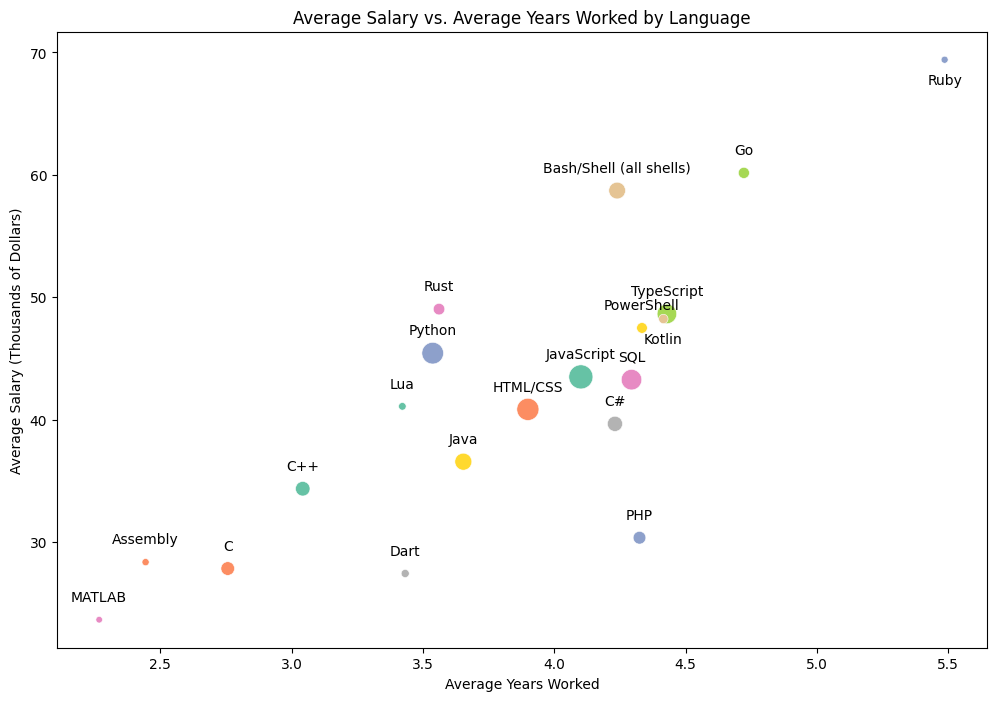

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the dictionary
data = {
    'Language': [],
    'Years Worked': [],
    'Salary': [],
    'Respondents': []
}

for language, values in languages.items():
    data['Language'].append(language)
    data['Years Worked'].append(values[-1])
    data['Salary'].append(values[-2] / 1000)
    data["Respondents"].append(values[-3])

new_df = pd.DataFrame(data)

# Scale the dot size based on the number of respondents
dot_size = new_df['Respondents'] / new_df['Respondents'].max() * 300

# Create a scatter plot using seaborn with scaled dot size
plt.figure(figsize=(12, 8))
sns.scatterplot(data=new_df, x='Years Worked', y='Salary', hue='Language', palette='Set2', s=dot_size, legend=False)

# Add labels for each point
for i in range(len(new_df)):
    if data['Language'][i] in ['Ruby', 'Kotlin']:
        plt.text(new_df['Years Worked'][i], new_df['Salary'][i] - 2, new_df['Language'][i], fontsize=10, ha='center')
        continue
    plt.text(new_df['Years Worked'][i], new_df['Salary'][i] + 1.5, new_df['Language'][i], fontsize=10, ha='center')

# Set labels and title
plt.xlabel('Average Years Worked')
plt.ylabel('Average Salary (Thousands of Dollars)')
plt.title('Average Salary vs. Average Years Worked by Language')

# Show the plot
plt.savefig('graphs/scatter.png', bbox_inches='tight', dpi=600)
plt.show()

## All done!